In [1]:
!pip install -U autogluon > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [2]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle('/kaggle/input/com6101-groupproject/spline_inputed_daily_sales_FE.pkl')
data['item_id'] = 'A1'
data.drop(columns=['isinterpolate','Sales'], inplace=True)
data.head()

,Sales_inputed,year,month,weekday,quarter,is_weekend,Sales_inputed_lag_1,Sales_inputed_lag_7,Sales_inputed_lag_30,Sales_inputed_rolling_mean_7,Sales_inputed_rolling_mean_30,rolling_ema_7,rolling_ema_30,item_id
Order Date,,,,,,,,,,,,,,
2014-01-03,16.448,2014,1,4,1,0,713.790,6233.0540,5331.178,1167.584230,2478.029374,16.448000,16.448000,A1
2014-01-04,288.060,2014,1,5,1,1,16.448,2698.9270,9951.182,1028.218172,2098.433168,171.654857,156.780867,A1
2014-01-05,19.536,2014,1,6,1,1,288.060,814.5940,1403.842,1086.691903,2134.900378,105.873730,107.949946,A1
2014-01-06,4407.100,2014,1,0,1,0,19.536,177.6360,2639.638,1679.590079,2168.557241,1678.893623,1292.522451,A1
2014-01-07,87.158,2014,1,1,1,0,4407.100,1657.3508,1453.136,1747.806526,2202.430323,1157.146735,1018.272855,A1


## Dataset Split - Predicting Next 30 Days

In [4]:
train_daily_sales = data.loc['2014-01':'2017-11']
test_daily_sales = data.loc['2017-12':'2017-12']

In [5]:
train_daily_sales= train_daily_sales.reset_index()
test_daily_sales= test_daily_sales.reset_index()

In [6]:
train_daily_sales.head()

,Order Date,Sales_inputed,year,month,weekday,quarter,is_weekend,Sales_inputed_lag_1,Sales_inputed_lag_7,Sales_inputed_lag_30,Sales_inputed_rolling_mean_7,Sales_inputed_rolling_mean_30,rolling_ema_7,rolling_ema_30,item_id
0,2014-01-03,16.448,2014,1,4,1,0,713.790,6233.0540,5331.178,1167.584230,2478.029374,16.448000,16.448000,A1
1,2014-01-04,288.060,2014,1,5,1,1,16.448,2698.9270,9951.182,1028.218172,2098.433168,171.654857,156.780867,A1
2,2014-01-05,19.536,2014,1,6,1,1,288.060,814.5940,1403.842,1086.691903,2134.900378,105.873730,107.949946,A1
3,2014-01-06,4407.100,2014,1,0,1,0,19.536,177.6360,2639.638,1679.590079,2168.557241,1678.893623,1292.522451,A1
4,2014-01-07,87.158,2014,1,1,1,0,4407.100,1657.3508,1453.136,1747.806526,2202.430323,1157.146735,1018.272855,A1


In [7]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train_daily_sales,
    id_column="item_id",
    timestamp_column="Order Date",
    # static_features_df=static_features_df,
)
train_data.head()

Sales_inputed  year  month  weekday  quarter  is_weekend  \
item_id timestamp                                                              
A1      2014-01-03         16.448  2014      1        4        1           0   
        2014-01-04        288.060  2014      1        5        1           1   
        2014-01-05         19.536  2014      1        6        1           1   
        2014-01-06       4407.100  2014      1        0        1           0   
        2014-01-07         87.158  2014      1        1        1           0   

                    Sales_inputed_lag_1  Sales_inputed_lag_7  \
item_id timestamp                                              
A1      2014-01-03              713.790            6233.0540   
        2014-01-04               16.448            2698.9270   
        2014-01-05              288.060             814.5940   
        2014-01-06               19.536             177.6360   
        2014-01-07             4407.100            1657.3508   

                    Sales_inputed_lag_30  Sales_inputed_rolling_mean_7  \
item_id timestamp                                                        
A1      2014-01-03              5331.178                   1167.584230   
        2014-01-04              9951.182                   1028.218172   
        2014-01-05              1403.842                   1086.691903   
        2014-01-06              2639.638                   1679.590079   
        2014-01-07              1453.136                   1747.806526   

                    Sales_inputed_rolling_mean_30  rolling_ema_7  \
item_id timestamp                                                  
A1      2014-01-03                    2478.029374      16.448000   
        2014-01-04                    2098.433168     171.654857   
        2014-01-05                    2134.900378     105.873730   
        2014-01-06                    2168.557241    1678.893623   
        2014-01-07                    2202.430323    1157.146735   

                    rolling_ema_30  
item_id timestamp                   
A1      2014-01-03       16.448000  
        2014-01-04      156.780867  
        2014-01-05      107.949946  
        2014-01-06     1292.522451  
        2014-01-07     1018.272855

In [8]:
train_data.shape

(1428, 13)

In [9]:
test_daily_sales_ts = TimeSeriesDataFrame.from_data_frame(
    test_daily_sales,
    id_column="item_id",
    timestamp_column="Order Date",
    # static_features_df=static_features_df,
)

In [10]:
all_data = TimeSeriesDataFrame.from_data_frame(
    data.reset_index(),
    id_column="item_id",
    timestamp_column="Order Date",
    # static_features_df=static_features_df,
)

## Add Holiday Features

In [11]:
import holidays

timestamps = train_data.index.get_level_values("timestamp")
country_holidays = holidays.country_holidays(
    country="US",  # make sure to select the correct country/region!
    # Add + 2 year to make sure that holidays are initialized for the forecast horizon
    years=range(timestamps.min().year, timestamps.max().year + 2),
)
# # Convert dict to pd.Series for pretty visualization
pd.Series(country_holidays).sort_index().head()

2014-01-01                New Year's Day
2014-01-20    Martin Luther King Jr. Day
2014-02-17         Washington's Birthday
2014-05-26                  Memorial Day
2014-07-04              Independence Day
dtype: object

In [12]:
def add_holiday_features(
    ts_df: TimeSeriesDataFrame,
    country_holidays: dict,
    include_individual_holidays: bool = True,
    include_holiday_indicator: bool = True,
) -> TimeSeriesDataFrame:
    """Add holiday indicator columns to a TimeSeriesDataFrame."""
    ts_df = ts_df.copy()
    timestamps = ts_df.index.get_level_values("timestamp")
    country_holidays_df = pd.get_dummies(pd.Series(country_holidays)).astype(float)
    holidays_df = country_holidays_df.reindex(timestamps.date).fillna(0)
    if include_individual_holidays:
        ts_df[holidays_df.columns] = holidays_df.values
    if include_holiday_indicator:
        ts_df["Holiday"] = holidays_df.max(axis=1).values
    return ts_df

In [13]:
train_data_with_holidays = add_holiday_features(train_data, country_holidays)
train_data_with_holidays.head()

Sales_inputed  year  month  weekday  quarter  is_weekend  \
item_id timestamp                                                              
A1      2014-01-03         16.448  2014      1        4        1           0   
        2014-01-04        288.060  2014      1        5        1           1   
        2014-01-05         19.536  2014      1        6        1           1   
        2014-01-06       4407.100  2014      1        0        1           0   
        2014-01-07         87.158  2014      1        1        1           0   

                    Sales_inputed_lag_1  Sales_inputed_lag_7  \
item_id timestamp                                              
A1      2014-01-03              713.790            6233.0540   
        2014-01-04               16.448            2698.9270   
        2014-01-05              288.060             814.5940   
        2014-01-06               19.536             177.6360   
        2014-01-07             4407.100            1657.3508   

                    Sales_inputed_lag_30  Sales_inputed_rolling_mean_7  ...  \
item_id timestamp                                                       ...   
A1      2014-01-03              5331.178                   1167.584230  ...   
        2014-01-04              9951.182                   1028.218172  ...   
        2014-01-05              1403.842                   1086.691903  ...   
        2014-01-06              2639.638                   1679.590079  ...   
        2014-01-07              1453.136                   1747.806526  ...   

                    Labor Day  Martin Luther King Jr. Day  Memorial Day  \
item_id timestamp                                                         
A1      2014-01-03        0.0                         0.0           0.0   
        2014-01-04        0.0                         0.0           0.0   
        2014-01-05        0.0                         0.0           0.0   
        2014-01-06        0.0                         0.0           0.0   
        2014-01-07        0.0                         0.0           0.0   

                    New Year's Day  New Year's Day (observed)  Thanksgiving  \
item_id timestamp                                                             
A1      2014-01-03             0.0                        0.0           0.0   
        2014-01-04             0.0                        0.0           0.0   
        2014-01-05             0.0                        0.0           0.0   
        2014-01-06             0.0                        0.0           0.0   
        2014-01-07             0.0                        0.0           0.0   

                    Veterans Day  Veterans Day (observed)  \
item_id timestamp                                           
A1      2014-01-03           0.0                      0.0   
        2014-01-04           0.0                      0.0   
        2014-01-05           0.0                      0.0   
        2014-01-06           0.0                      0.0   
        2014-01-07           0.0                      0.0   

                    Washington's Birthday  Holiday  
item_id timestamp                                   
A1      2014-01-03                    0.0      0.0  
        2014-01-04                    0.0      0.0  
        2014-01-05                    0.0      0.0  
        2014-01-06                    0.0      0.0  
        2014-01-07                    0.0      0.0  

[5 rows x 28 columns]

In [14]:
train_data_with_holidays.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 1428 entries, ('A1', Timestamp('2014-01-03 00:00:00')) to ('A1', Timestamp('2017-11-30 00:00:00'))
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sales_inputed                  1428 non-null   float64
 1   year                           1428 non-null   int32  
 2   month                          1428 non-null   int32  
 3   weekday                        1428 non-null   int32  
 4   quarter                        1428 non-null   int32  
 5   is_weekend                     1428 non-null   int32  
 6   Sales_inputed_lag_1            1428 non-null   float64
 7   Sales_inputed_lag_7            1428 non-null   float64
 8   Sales_inputed_lag_30           1428 non-null   float64
 9   Sales_inputed_rolling_mean_7   1428 non-null   float64
 10  Sales_inputed_rolling_mean_30  1428 non-null   float64
 11 

## Extract known_covariates_columns

In [15]:
holiday_columns = train_data_with_holidays.columns.difference(train_data.columns)

In [16]:
known_covariates_columns = train_data_with_holidays.columns[1:6].append(holiday_columns)
known_covariates_columns

Index(['year', 'month', 'weekday', 'quarter', 'is_weekend', 'Christmas Day',
       'Christmas Day (observed)', 'Columbus Day', 'Holiday',
       'Independence Day', 'Independence Day (observed)', 'Labor Day',
       'Martin Luther King Jr. Day', 'Memorial Day', 'New Year's Day',
       'New Year's Day (observed)', 'Thanksgiving', 'Veterans Day',
       'Veterans Day (observed)', 'Washington's Birthday'],
      dtype='object')

### Need to create known covariates for prediction time steps in advance

In [17]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data_with_holidays, prediction_length=30)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)

In [18]:
known_covariates['year'] = future_timestamps.year
known_covariates['month'] = future_timestamps.month
known_covariates['weekday'] = future_timestamps.dayofweek
known_covariates['quarter'] = future_timestamps.quarter
known_covariates['is_weekend'] = future_timestamps.dayofweek.isin([5, 6]).astype(int)
known_covariates = add_holiday_features(known_covariates, country_holidays)
known_covariates.head()

year  month  weekday  quarter  is_weekend  Christmas Day  \
item_id timestamp                                                              
A1      2017-12-01  2017     12        4        4           0            0.0   
        2017-12-02  2017     12        5        4           1            0.0   
        2017-12-03  2017     12        6        4           1            0.0   
        2017-12-04  2017     12        0        4           0            0.0   
        2017-12-05  2017     12        1        4           0            0.0   

                    Christmas Day (observed)  Columbus Day  Independence Day  \
item_id timestamp                                                              
A1      2017-12-01                       0.0           0.0               0.0   
        2017-12-02                       0.0           0.0               0.0   
        2017-12-03                       0.0           0.0               0.0   
        2017-12-04                       0.0           0.0               0.0   
        2017-12-05                       0.0           0.0               0.0   

                    Independence Day (observed)  Labor Day  \
item_id timestamp                                            
A1      2017-12-01                          0.0        0.0   
        2017-12-02                          0.0        0.0   
        2017-12-03                          0.0        0.0   
        2017-12-04                          0.0        0.0   
        2017-12-05                          0.0        0.0   

                    Martin Luther King Jr. Day  Memorial Day  New Year's Day  \
item_id timestamp                                                              
A1      2017-12-01                         0.0           0.0             0.0   
        2017-12-02                         0.0           0.0             0.0   
        2017-12-03                         0.0           0.0             0.0   
        2017-12-04                         0.0           0.0             0.0   
        2017-12-05                         0.0           0.0             0.0   

                    New Year's Day (observed)  Thanksgiving  Veterans Day  \
item_id timestamp                                                           
A1      2017-12-01                        0.0           0.0           0.0   
        2017-12-02                        0.0           0.0           0.0   
        2017-12-03                        0.0           0.0           0.0   
        2017-12-04                        0.0           0.0           0.0   
        2017-12-05                        0.0           0.0           0.0   

                    Veterans Day (observed)  Washington's Birthday  Holiday  
item_id timestamp                                                            
A1      2017-12-01                      0.0                    0.0      0.0  
        2017-12-02                      0.0                    0.0      0.0  
        2017-12-03                      0.0                    0.0      0.0  
        2017-12-04                      0.0                    0.0      0.0  
        2017-12-05                      0.0                    0.0      0.0

## Training

In [25]:
predictor = TimeSeriesPredictor(
    prediction_length=30,
    target="Sales_inputed",
    known_covariates_names=known_covariates_columns,
    eval_metric="RMSE"
).fit(
    train_data=train_data_with_holidays,
    hyperparameters={
        "SeasonalNaive":{},
        "AutoETS":{},
        "DeepAR":{},
        "PatchTST":{},
        "TemporalFusionTransformer":{},
        "Chronos": [
            # Zero-shot model WITHOUT covariates
            {"model_path": "bolt_base", 
             "ag_args": {"name_suffix": "ZeroShot"}
            },
            # Zero-shot Chronos-Bolt (Small) combined with XGB on covariates
            {
                "model_path": "bolt_base",
                "covariate_regressor": "XGB",
                "target_scaler": "standard",
                "ag_args": {"name_suffix": "ZeroShotWithRegressor"},
            },
            # FineTuned Chronos-Bolt (Small) WITHOUT covariates
            {"model_path": "bolt_base", 
             "fine_tune": True,
             "fine_tune_lr": 1e-4, 
             "fine_tune_steps": 3000,
             "fine_tune_batch_size": 64,
            #  "keep_transformers_logs": True,
             # "fine_tune_trainer_kwargs": {},
             "ag_args": {"name_suffix": "FineTuned"}
            },
            # FineTuned Chronos-Bolt (Small) combined with XGB on covariates
            {"model_path": "bolt_base", 
             "fine_tune": True,
             "fine_tune_lr": 1e-4, 
             "fine_tune_steps": 3000,
              "fine_tune_batch_size": 64,
            #  "keep_transformers_logs": True,
             # "fine_tune_trainer_kwargs": {},
             "covariate_regressor": "XGB",
             "target_scaler": "standard",
             "ag_args": {"name_suffix": "FineTunedWithRegressor"}
            },
        ]
    },
    # time_limit=600,  # time limit in seconds
    enable_ensemble=False,
    # presets="high_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250405_175604"
Beginning AutoGluon training...
AutoGluon will save models to '/kaggle/working/AutogluonModels/ag-20250405_175604'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
GPU Count:          1
Memory Avail:       30.16 GB / 31.35 GB (96.2%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': RMSE,
 'hyperparameters': {'AutoETS': {},
                     'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_base'},
                                 {'ag_args': {'name_suffix': 'ZeroShotWithRegressor'},
                                  'covariate_regressor': 'XGB',
                                  'mod

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	-3737.8068    = Validation score (-RMSE)
	18.62   s     = Training runtime
	12.11   s     = Validation (prediction) runtime
Training timeseries model ChronosZeroShotWithRegressor[bolt_base]. 
No path specified. Models will be saved in: "AutogluonModels/ag-20250405_175645XGBoostModel"
	-3415.6878    = Validation score (-RMSE)
	0.77    s     = Training runtime
	1.97    s     = Validation (prediction) runtime
Training timeseries model ChronosFineTuned[bolt_base]. 
	Saving fine-tuned model to /kaggle/working/AutogluonModels/ag-20250405_175604/models/ChronosFineTuned[bolt_base]/W0/fine-tuned-ckpt
	-3419.3514    = Validation score (-RMSE)
	1932.47 s     = Training runtime
	0.04    s     = Validation (prediction) runtime
Training timeseries model ChronosFineTunedWithRegressor[bolt_base]. 
No path specified. Models will be saved in: "AutogluonModels/ag-20250405_182900XGBoostModel"
	Saving fine-tuned model to /kaggle/working/AutogluonModels/ag-20250405_175604/models/ChronosFineTunedWithRegress

## Evaluation Results

In [26]:
predictor.leaderboard()

,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-2981.459646,0.156827,37.422774,8
1,ChronosFineTunedWithRegressor[bolt_base],-3285.408524,0.064469,1932.807528,6
2,AutoETS,-3291.580858,5.046679,0.019420,2
3,PatchTST,-3343.070479,0.028124,17.380203,9
4,TemporalFusionTransformer,-3413.048763,0.043350,44.805099,7
5,ChronosZeroShotWithRegressor[bolt_base],-3415.687753,1.968814,0.765646,4
6,ChronosFineTuned[bolt_base],-3419.351393,0.035730,1932.466278,5
7,ChronosZeroShot[bolt_base],-3737.806760,12.107763,18.624086,3
8,SeasonalNaive,-4323.068095,1.473620,0.021361,1


## SeasonalNaive

Text(0.5, 1.0, 'SeasonalNaive')

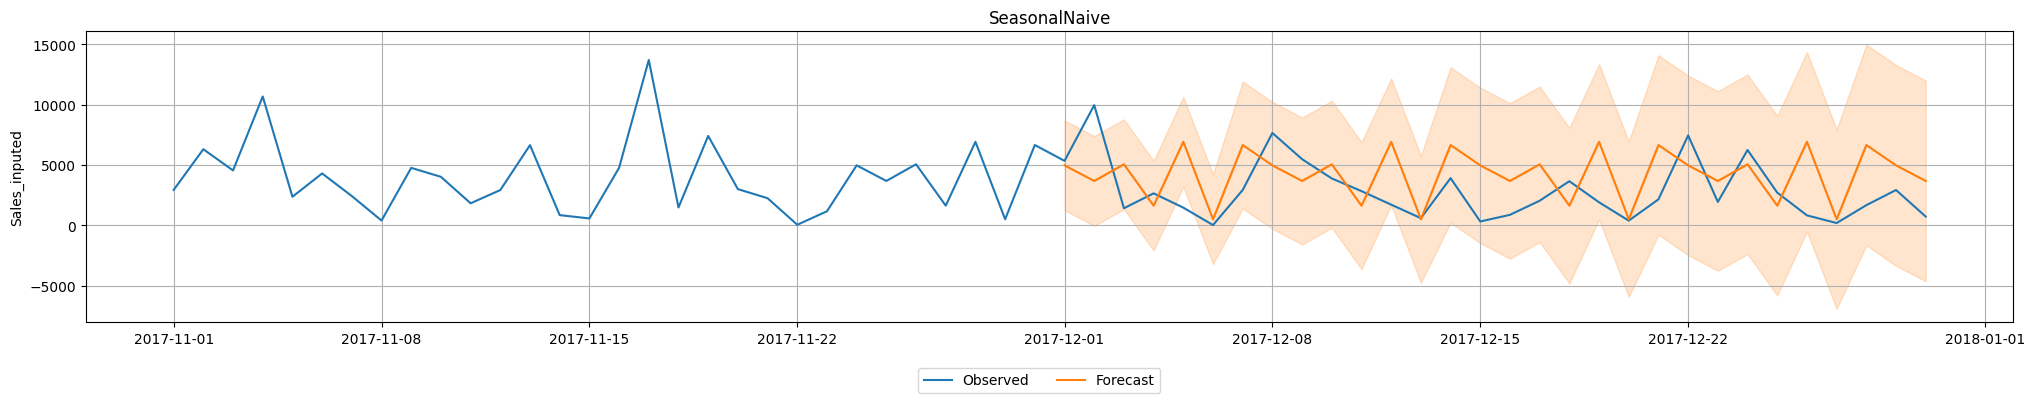

In [27]:
SeasonalNaive_predictions = predictor.predict(train_data_with_holidays, 
                                              known_covariates=known_covariates,
                                              model = 'SeasonalNaive'
                                             )

predictor.plot(all_data, 
               SeasonalNaive_predictions, 
               # quantile_levels=[0.1, 0.9],
               max_history_length=60,
               # max_num_item_ids=4
              );

ax = plt.gca()
ax.set_title("SeasonalNaive")

## ETS

Text(0.5, 1.0, 'ETS')

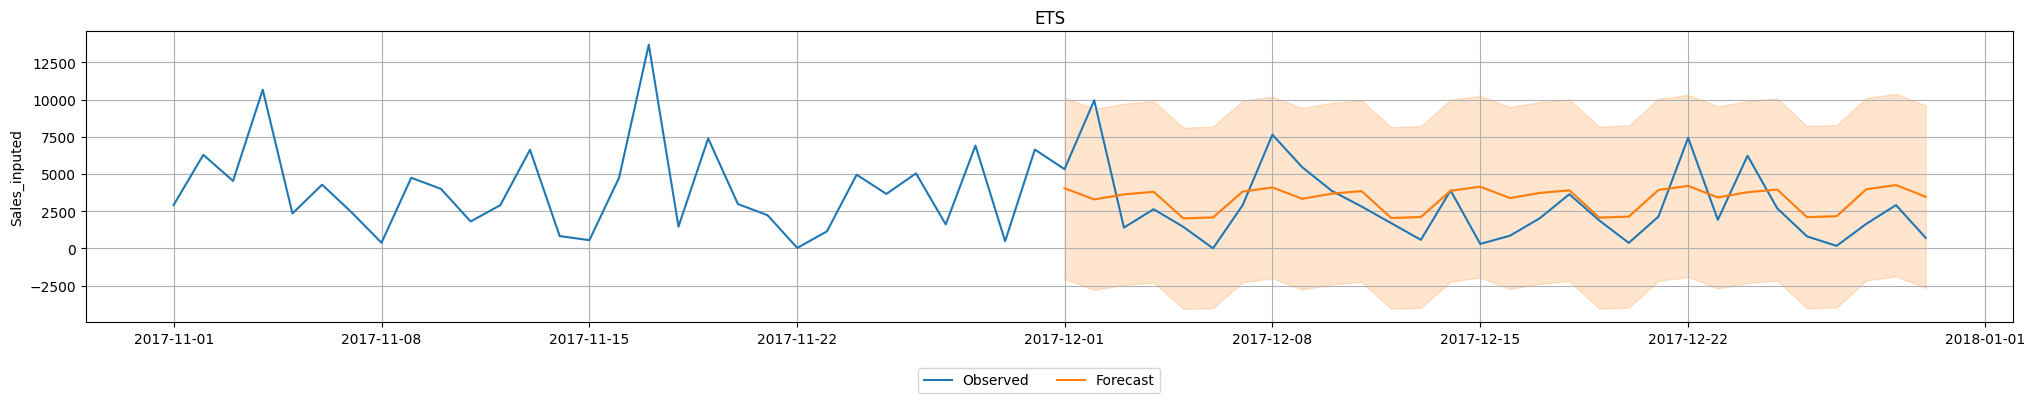

In [28]:
ETS_predictions = predictor.predict(train_data_with_holidays, 
                                              known_covariates=known_covariates,
                                              model = 'AutoETS'
                                             )

predictor.plot(all_data, 
               ETS_predictions, 
               # quantile_levels=[0.1, 0.9],
               max_history_length=60,
               # max_num_item_ids=4
              );
ax = plt.gca()
ax.set_title("ETS")

## DeepAR

Text(0.5, 1.0, 'DeepAR')

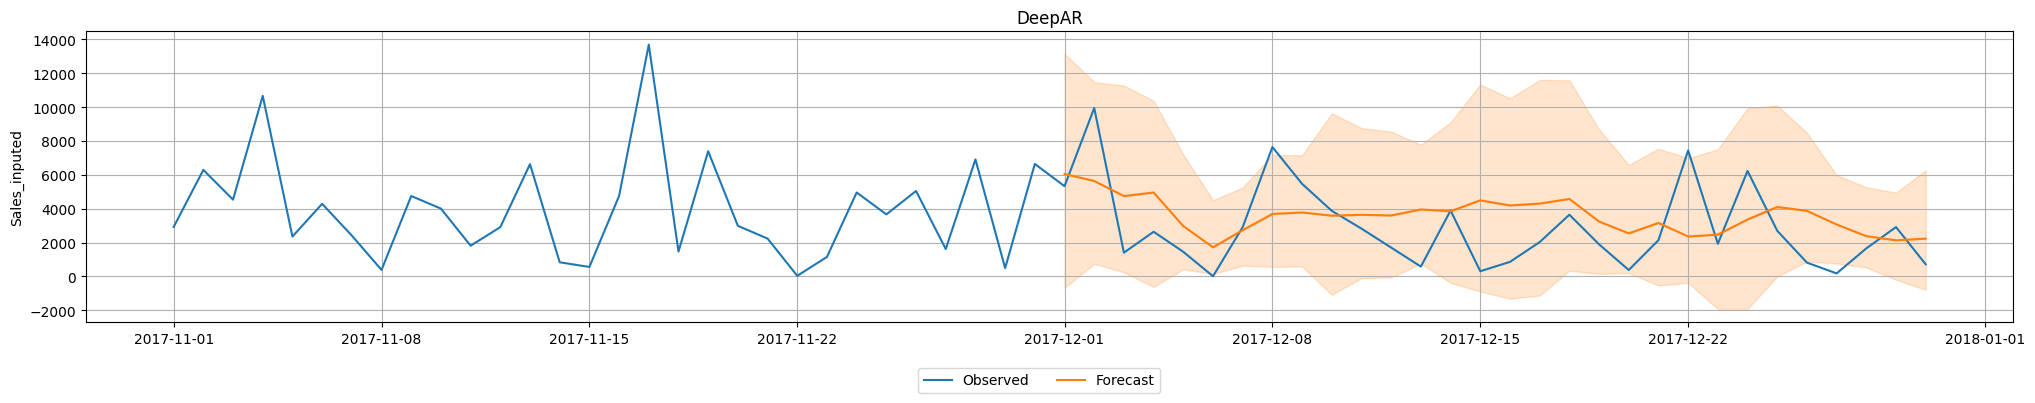

In [29]:
DeepAR_predictions = predictor.predict(train_data_with_holidays, 
                                              known_covariates=known_covariates,
                                              model = 'DeepAR'
                                             )

predictor.plot(all_data, 
               DeepAR_predictions, 
               # quantile_levels=[0.1, 0.9],
               max_history_length=60,
               # max_num_item_ids=4
              );

ax = plt.gca()
ax.set_title("DeepAR")

## PatchTST

Text(0.5, 1.0, 'PatchTST')

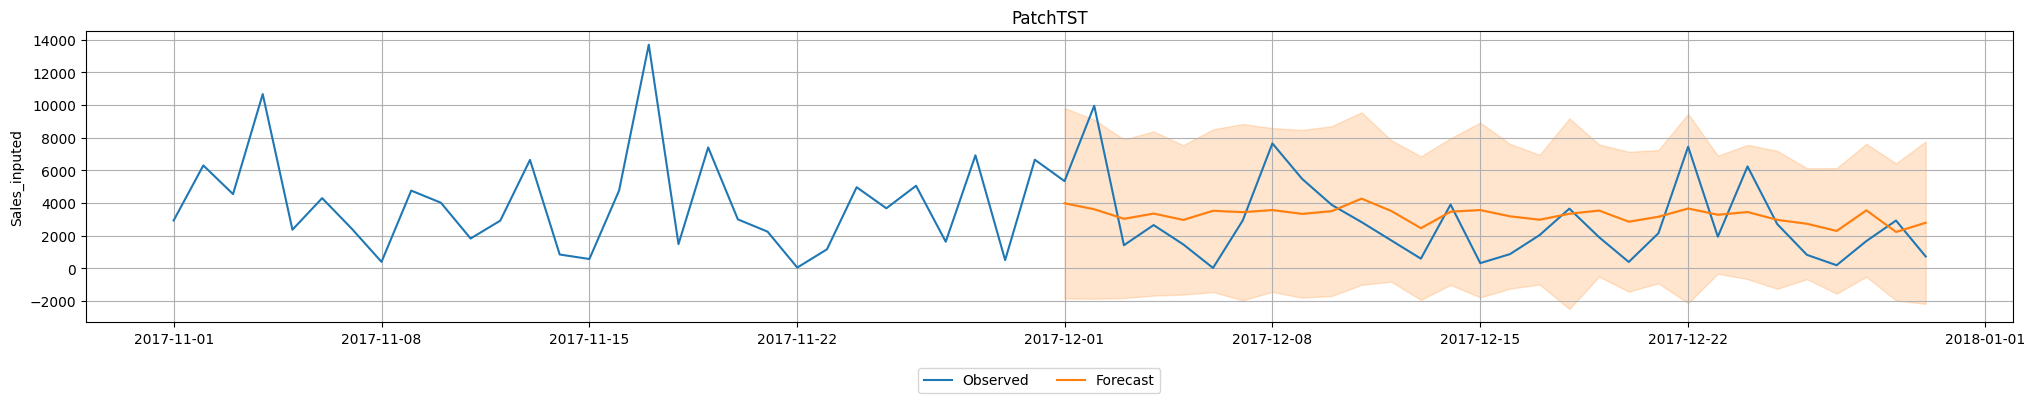

In [30]:
PatchTST_predictions = predictor.predict(train_data_with_holidays, 
                                              known_covariates=known_covariates,
                                              model = 'PatchTST'
                                             )

predictor.plot(all_data, 
               PatchTST_predictions, 
               # quantile_levels=[0.1, 0.9],
               max_history_length=60,
               # max_num_item_ids=4
              );

ax = plt.gca()
ax.set_title("PatchTST")

## TemporalFusionTransformer

Text(0.5, 1.0, 'TemporalFusionTransformer')

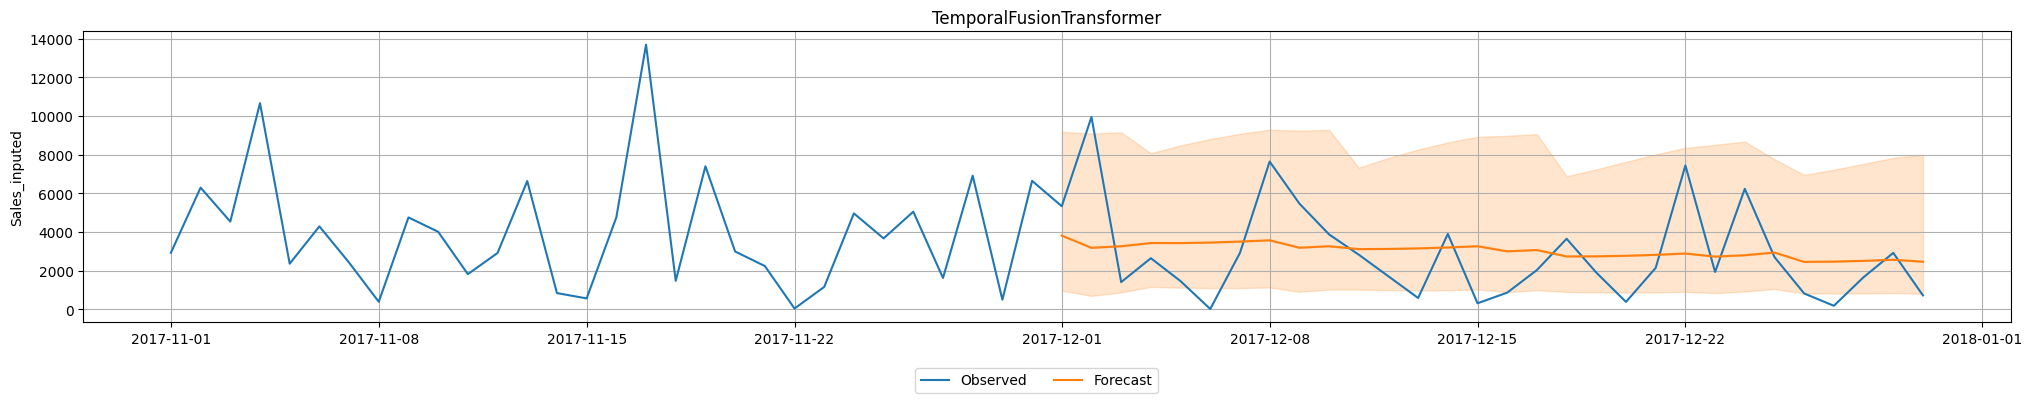

In [31]:
TFT_predictions = predictor.predict(train_data_with_holidays, 
                                              known_covariates=known_covariates,
                                              model = 'TemporalFusionTransformer'
                                             )

predictor.plot(all_data, 
               TFT_predictions, 
               # quantile_levels=[0.1, 0.9],
               max_history_length=60,
               # max_num_item_ids=4
              );

ax = plt.gca()
ax.set_title("TemporalFusionTransformer")

## 	ChronosZeroShot[bolt_base]

Text(0.5, 1.0, 'ChronosZeroShot[bolt_base]')

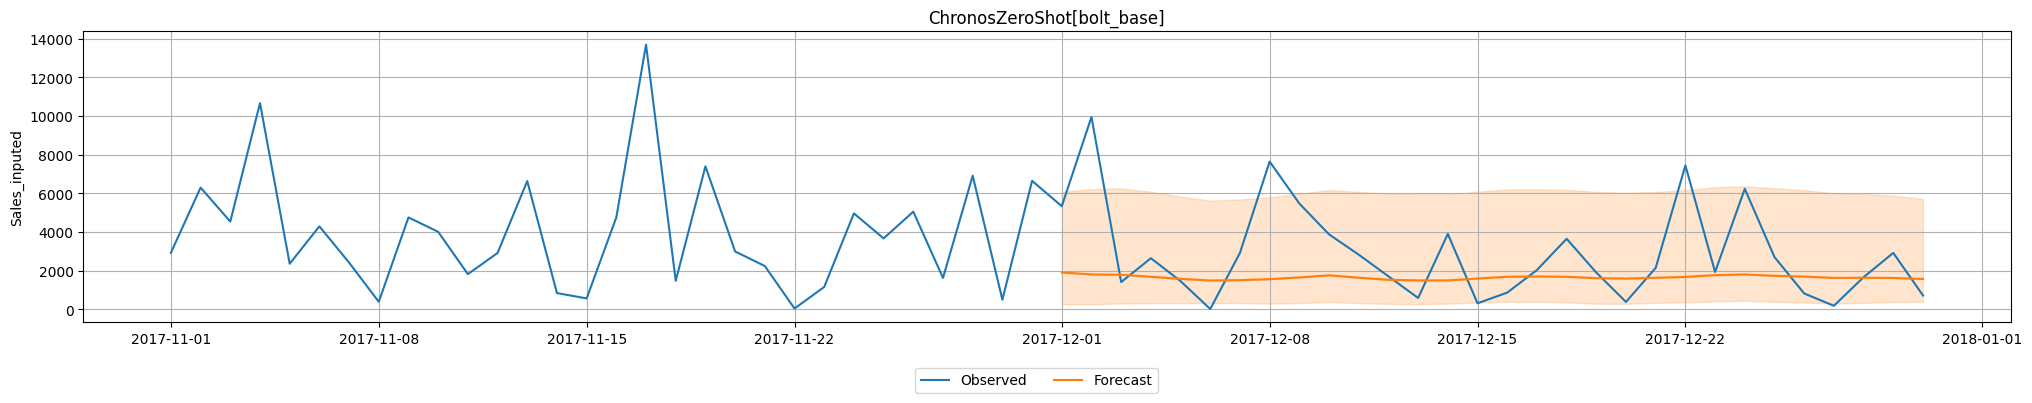

In [32]:
predictions = predictor.predict(
    data  = train_data_with_holidays, 
    known_covariates=known_covariates,
    model = 'ChronosZeroShot[bolt_base]'
)


predictor.plot(all_data, 
               predictions, 
               quantile_levels=[0.1, 0.9],
               max_history_length=60, 
               # max_num_item_ids=4
              )

ax = plt.gca()
ax.set_title("ChronosZeroShot[bolt_base]")

## 	ChronosZeroShotWithRegressor[bolt_base]

Text(0.5, 1.0, 'ChronosZeroShotWithRegressor[bolt_base]')

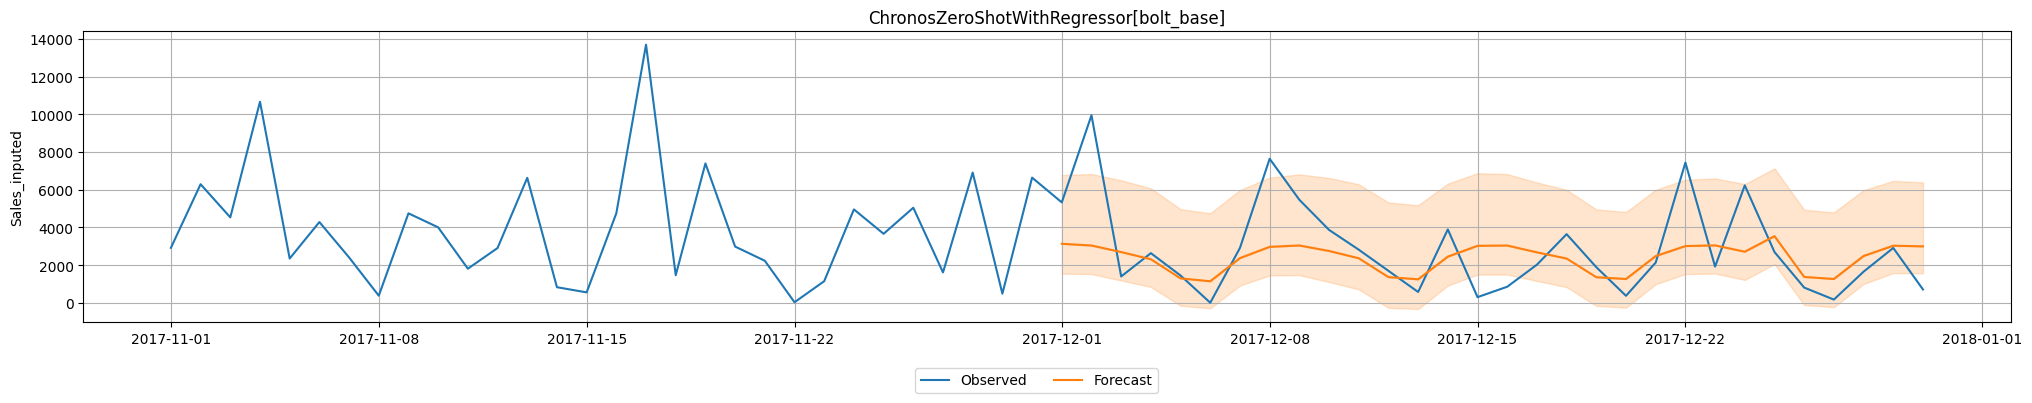

In [33]:
predictions = predictor.predict(
    data  = train_data_with_holidays, 
    known_covariates=known_covariates,
    model = 'ChronosZeroShotWithRegressor[bolt_base]'
)


predictor.plot(all_data, 
               predictions, 
               quantile_levels=[0.1, 0.9],
               max_history_length=60, 
               # max_num_item_ids=4
              )

ax = plt.gca()
ax.set_title("ChronosZeroShotWithRegressor[bolt_base]")

## ChronosFineTuned[bolt_base]

Text(0.5, 1.0, 'ChronosFineTuned[bolt_base]')

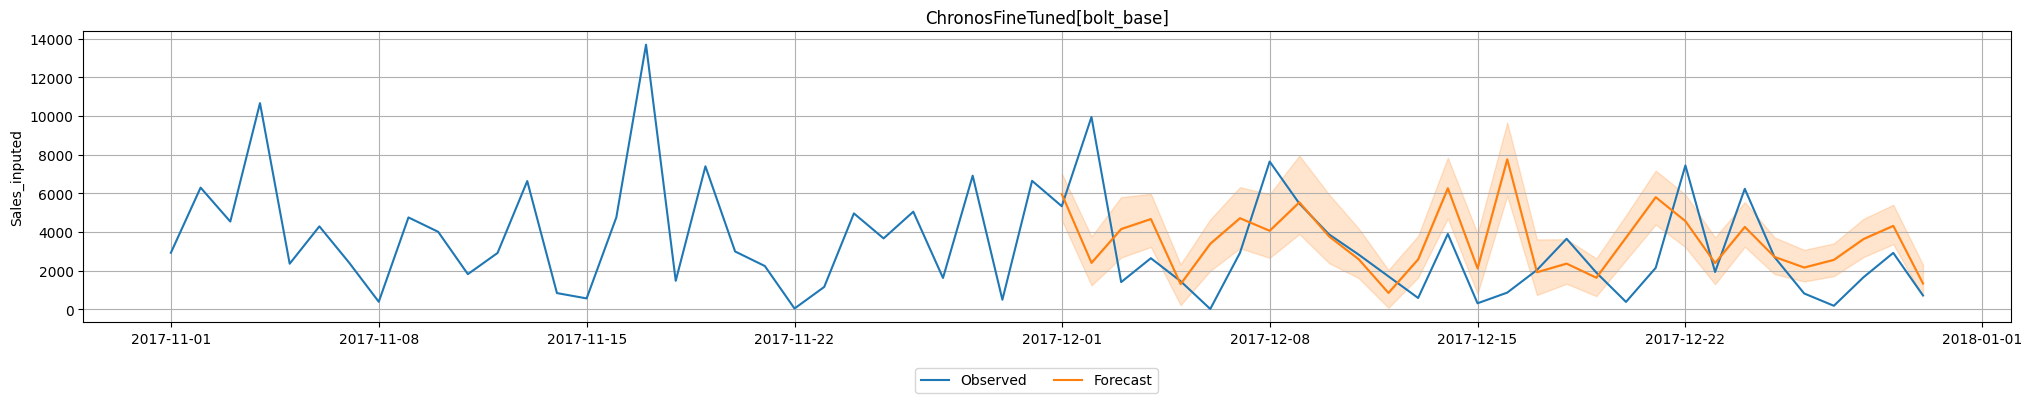

In [34]:
predictions = predictor.predict(
    data  = train_data_with_holidays, 
    known_covariates=known_covariates,
    model = 'ChronosFineTuned[bolt_base]'
)


predictor.plot(all_data, 
               predictions, 
               quantile_levels=[0.1, 0.9],
               max_history_length=60, 
               # max_num_item_ids=4
              )

ax = plt.gca()
ax.set_title("ChronosFineTuned[bolt_base]")

## 	ChronosFineTunedWithRegressor[bolt_base]

Text(0.5, 1.0, 'ChronosFineTunedWithRegressor[bolt_base]')

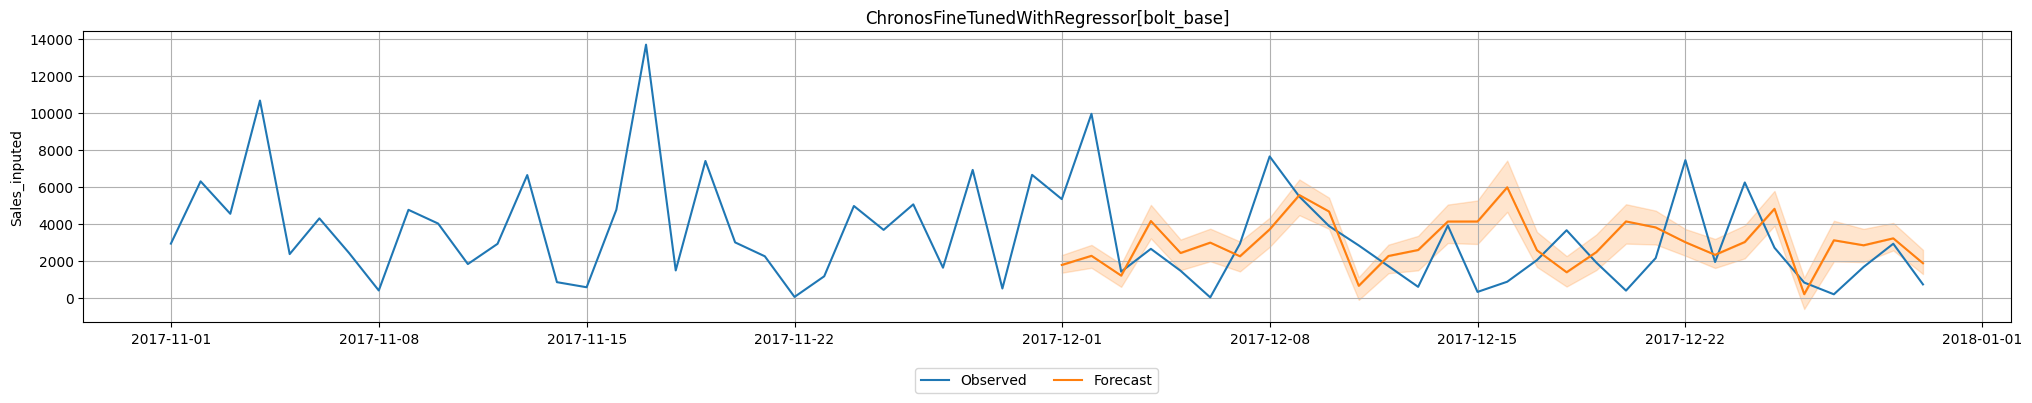

In [35]:
predictions = predictor.predict(
    data  = train_data_with_holidays, 
    known_covariates=known_covariates,
    model = 'ChronosFineTunedWithRegressor[bolt_base]'
)


predictor.plot(all_data, 
               predictions, 
               quantile_levels=[0.1, 0.9],
               max_history_length=60, 
               # max_num_item_ids=4
              )

ax = plt.gca()
ax.set_title("ChronosFineTunedWithRegressor[bolt_base]")

##  ChronosFineTunedWithRegressor[bolt_base] predict next 30 day

In [ ]:
all_data_with_holidays = add_holiday_features(all_data, country_holidays)

In [ ]:
future_index = get_forecast_horizon_index_ts_dataframe(all_data_with_holidays, prediction_length=30)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)

known_covariates['year'] = future_timestamps.year
known_covariates['month'] = future_timestamps.month
known_covariates['weekday'] = future_timestamps.dayofweek
known_covariates['quarter'] = future_timestamps.quarter
known_covariates['is_weekend'] = future_timestamps.dayofweek.isin([5, 6]).astype(int)
known_covariates = add_holiday_features(known_covariates, country_holidays)
# known_covariates.head()

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=30,
    target="Sales_inputed",
    known_covariates_names=known_covariates_columns,
    eval_metric="RMSE"
).fit(
    train_data=all_data_with_holidays,
    hyperparameters={
        "Chronos": [
            # FineTuned Chronos-Bolt (Small) combined with XGB on covariates
            {"model_path": "bolt_base", 
             "fine_tune": True,
             "fine_tune_lr": 1e-4, 
             "fine_tune_steps": 3000,
              "fine_tune_batch_size": 64,
            #  "keep_transformers_logs": True,
             # "fine_tune_trainer_kwargs": {},
             "covariate_regressor": "XGB",
             "target_scaler": "standard",
             "ag_args": {"name_suffix": "FineTunedWithRegressor"}
            },
        ]
    },
    # time_limit=600,  # time limit in seconds
    enable_ensemble=False,
    # presets="high_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250407_122538"
Beginning AutoGluon training...
AutoGluon will save models to '/kaggle/working/AutogluonModels/ag-20250407_122538'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
GPU Count:          1
Memory Avail:       30.15 GB / 31.35 GB (96.2%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': RMSE,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'FineTunedWithRegressor'},
                                  'covariate_regressor': 'XGB',
                                  'fine_tune': True,
                                  'fine_tune_batch_size': 64,
                                  'fine_tune_lr': 0.0001,
                                  'f

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	Saving fine-tuned model to /kaggle/working/AutogluonModels/ag-20250407_122538/models/ChronosFineTunedWithRegressor[bolt_base]/W0/fine-tuned-ckpt
	-2564.0934    = Validation score (-RMSE)
	1971.50 s     = Training runtime
	0.06    s     = Validation (prediction) runtime
Training complete. Models trained: ['ChronosFineTunedWithRegressor[bolt_base]']
Total runtime: 1971.64 s
Best model: ChronosFineTunedWithRegressor[bolt_base]
Best model score: -2564.0934


Text(0.5, 1.0, 'ChronosFineTunedWithRegressor[bolt_base]')

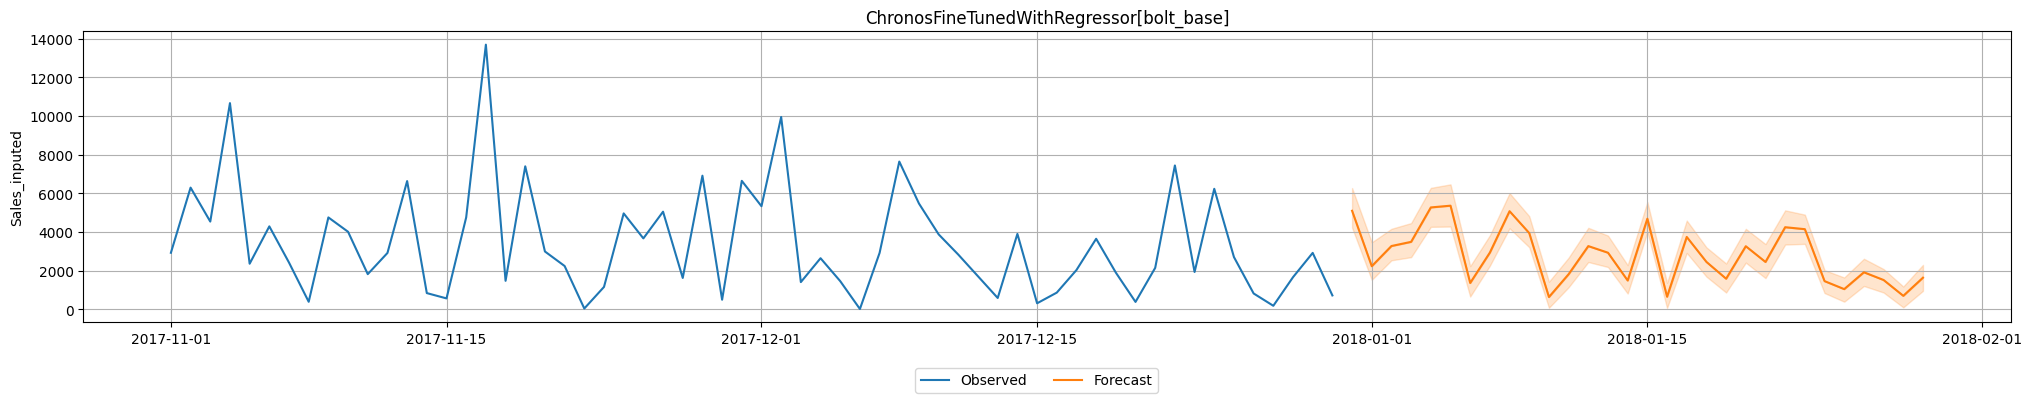

In [ ]:
predictions = predictor.predict(
    data  = all_data_with_holidays, 
    known_covariates=known_covariates,
    model = 'ChronosFineTunedWithRegressor[bolt_base]'
)


predictor.plot(all_data, 
               predictions, 
               quantile_levels=[0.1, 0.9],
               max_history_length=60, 
               # max_num_item_ids=4
              )

ax = plt.gca()
ax.set_title("ChronosFineTunedWithRegressor[bolt_base]")